# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>
Luca Maria Colombo Gomez - Matr: 934049

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

## Exercise 1

Using the Monte Carlo NVT code provided i've performed simulations via the metropolis algorithm, with $M = 10^5$ MC steps, and a metropolis acceptance ratio of $\sim 50\%$, after 2000 initial equilibration steps.
The thermodynamic conditions used are the following:

- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

I've printed out instantaneous values of potential energy per particle, $U/N$, and pressure, $P$, to study their autocorrelation functions and obtain the Monte Carlo correlation time. To obtain istantaneous values simply put the block size = 1 in the input file.

In [3]:
def autocovariance(data, lag):
    n = len(data)
    mean = 0
    for x in data:
        mean += x
    mean /= n
    cov = 0
    for i in range(n - lag):
        cov += (data[i] - mean)*(data[i + lag] - mean)
    return cov / n

def autocorrelation(data, lag):
    return autocovariance(data, lag) / autocovariance(data, 0)

def exp_fit(t, t0):
    return np.exp(-t / t0)

#### Solid phase

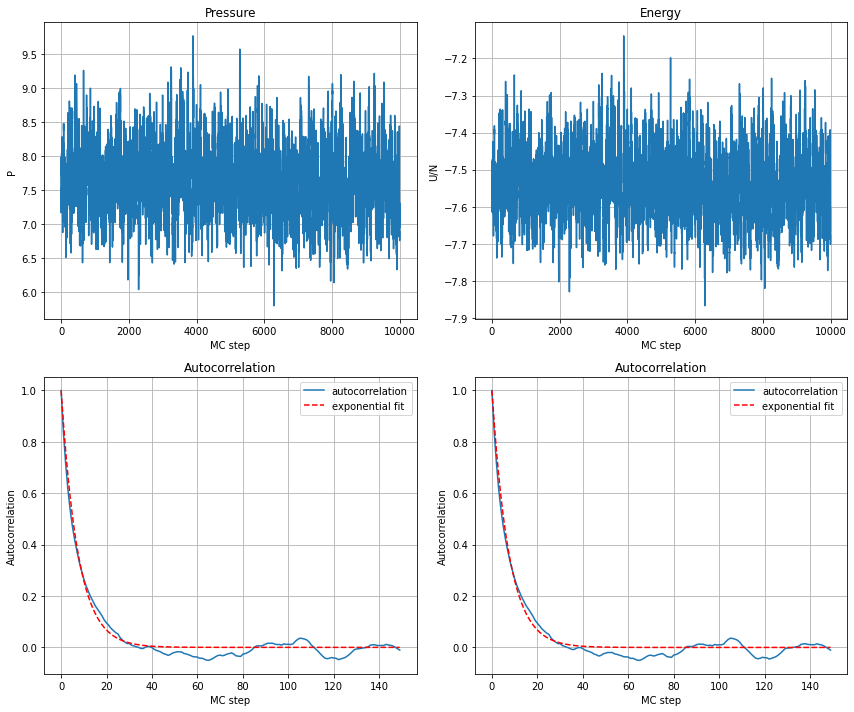

Pressure autocorrelation length =   7.408579009921119
Energy autocorrelation lenght =   7.43456603784411


In [4]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (6*2, 5*2))
axes = axes.flatten()

x_pres, y_pres = np.loadtxt("7.1-2/data/solid/output.pres.0", unpack = True, usecols = (0,1))
x_epot, y_epot = np.loadtxt("7.1-2/data/solid/output.epot.0", unpack = True, usecols = (0,1))

y_pres_solid = y_pres
y_epot_solid = y_epot

axes[0].plot(y_pres,label = 'P')
axes[0].set_title("Pressure")
axes[0].set_ylabel("P")

axes[1].plot(y_epot,label = 'U/N')
axes[1].set_title("Energy")
axes[1].set_ylabel("U/N")
for ax in axes:
    ax.set_xlabel("MC step")
    ax.grid(True)
    #ax.legend()
    
corr_pres = [autocorrelation(y_pres, t) for t in np.arange(150)]
corr_epot = [autocorrelation(y_epot, t) for t in np.arange(150)]

corr_lenght_pres, var_pres = optimize.curve_fit(exp_fit, np.arange(150), corr_pres)
corr_lenght_epot, var_epot = optimize.curve_fit(exp_fit, np.arange(150), corr_epot)

y_fit_pres = [exp_fit(t,corr_lenght_pres) for t in np.arange(150)]
y_fit_epot = [exp_fit(t,corr_lenght_epot) for t in np.arange(150)]


axes[2].plot(corr_pres, label = 'autocorrelation')
axes[2].plot(y_fit_pres,linestyle = 'dashed', color = 'red',label = 'exponential fit')
axes[2].set_title('Autocorrelation')
axes[2].set_ylabel('Autocorrelation')
axes[2].legend()

axes[3].plot(corr_epot, label = 'autocorrelation')
axes[3].plot(y_fit_epot,linestyle = 'dashed', color = 'red', label = 'exponential fit')
axes[3].set_title('Autocorrelation')
axes[3].set_ylabel('Autocorrelation')
axes[3].legend()

fig.tight_layout()
plt.show()

print("Pressure autocorrelation length =  ", corr_lenght_pres[0])
print("Energy autocorrelation lenght =  ", corr_lenght_epot[0])


### Liquid phase

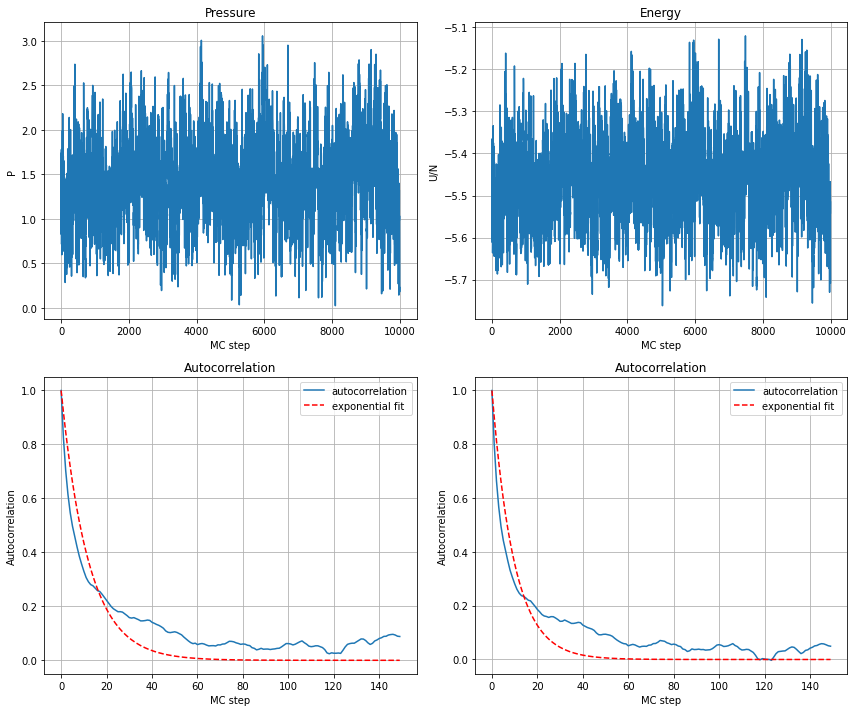

Pressure autocorrelation length =   12.025510586869412
Energy autocorrelation lenght =   9.693412569209077


In [5]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (6*2, 5*2))
axes = axes.flatten()

x_pres, y_pres = np.loadtxt("7.1-2/data/liquid/output.pres.0", unpack = True, usecols = (0,1))
x_epot, y_epot = np.loadtxt("7.1-2/data/liquid/output.epot.0", unpack = True, usecols = (0,1))

y_pres_liquid = y_pres
y_epot_liquid = y_epot

axes[0].plot(y_pres,label = 'P')
axes[0].set_title("Pressure")
axes[0].set_ylabel("P")

axes[1].plot(y_epot,label = 'U/N')
axes[1].set_title("Energy")
axes[1].set_ylabel("U/N")
for ax in axes:
    ax.set_xlabel("MC step")
    ax.grid(True)
    #ax.legend()
    
corr_pres = [autocorrelation(y_pres, t) for t in np.arange(150)]
corr_epot = [autocorrelation(y_epot, t) for t in np.arange(150)]

corr_lenght_pres, var_pres = optimize.curve_fit(exp_fit, np.arange(150), corr_pres)
corr_lenght_epot, var_epot = optimize.curve_fit(exp_fit, np.arange(150), corr_epot)

y_fit_pres = [exp_fit(t,corr_lenght_pres) for t in np.arange(150)]
y_fit_epot = [exp_fit(t,corr_lenght_epot) for t in np.arange(150)]


axes[2].plot(corr_pres, label = 'autocorrelation')
axes[2].plot(y_fit_pres,linestyle = 'dashed', color = 'red',label = 'exponential fit')
axes[2].set_title('Autocorrelation')
axes[2].set_ylabel('Autocorrelation')
axes[2].legend()

axes[3].plot(corr_epot, label = 'autocorrelation')
axes[3].plot(y_fit_epot,linestyle = 'dashed', color = 'red', label = 'exponential fit')
axes[3].set_title('Autocorrelation')
axes[3].set_ylabel('Autocorrelation')
axes[3].legend()

fig.tight_layout()
plt.show()

print("Pressure autocorrelation length =  ", corr_lenght_pres[0])
print("Energy autocorrelation lenght =  ", corr_lenght_epot[0])


### Gaseous phase

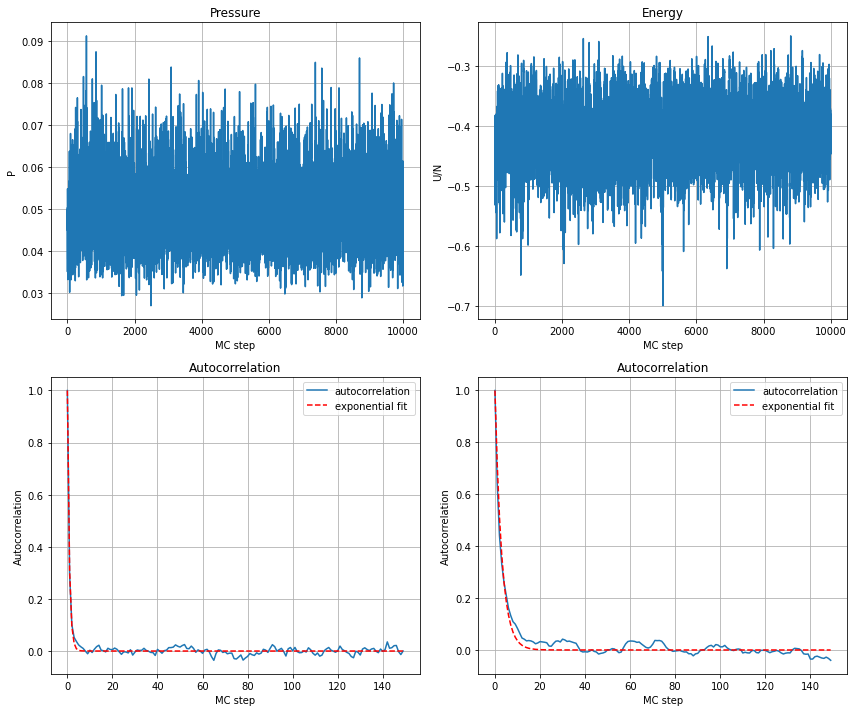

Pressure autocorrelation length =   0.8496304952772078
Energy autocorrelation lenght =   2.9908600094091113


In [6]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (6*2, 5*2))
axes = axes.flatten()

x_pres, y_pres = np.loadtxt("7.1-2/data/gas/output.pres.0", unpack = True, usecols = (0,1))
x_epot, y_epot = np.loadtxt("7.1-2/data/gas/output.epot.0", unpack = True, usecols = (0,1))

y_pres_gas = y_pres
y_epot_gas = y_epot

axes[0].plot(y_pres,label = 'P')
axes[0].set_title("Pressure")
axes[0].set_ylabel("P")

axes[1].plot(y_epot,label = 'U/N')
axes[1].set_title("Energy")
axes[1].set_ylabel("U/N")
for ax in axes:
    ax.set_xlabel("MC step")
    ax.grid(True)
    #ax.legend()
    
corr_pres = [autocorrelation(y_pres, t) for t in np.arange(150)]
corr_epot = [autocorrelation(y_epot, t) for t in np.arange(150)]

corr_lenght_pres, var_pres = optimize.curve_fit(exp_fit, np.arange(150), corr_pres)
corr_lenght_epot, var_epot = optimize.curve_fit(exp_fit, np.arange(150), corr_epot)

y_fit_pres = [exp_fit(t,corr_lenght_pres) for t in np.arange(150)]
y_fit_epot = [exp_fit(t,corr_lenght_epot) for t in np.arange(150)]


axes[2].plot(corr_pres, label = 'autocorrelation')
axes[2].plot(y_fit_pres,linestyle = 'dashed', color = 'red',label = 'exponential fit')
axes[2].set_title('Autocorrelation')
axes[2].set_ylabel('Autocorrelation')
axes[2].legend()

axes[3].plot(corr_epot, label = 'autocorrelation')
axes[3].plot(y_fit_epot,linestyle = 'dashed', color = 'red', label = 'exponential fit')
axes[3].set_title('Autocorrelation')
axes[3].set_ylabel('Autocorrelation')
axes[3].legend()

fig.tight_layout()
plt.show()

print("Pressure autocorrelation length =  ", corr_lenght_pres[0])
print("Energy autocorrelation lenght =  ", corr_lenght_epot[0])


The autocorrelation lenghts for the different phases are collected in the following table. It's notable that the exponential fit seems to underestimate the autocorrelation length for the liquid phase.


<table>
    <tr>
        <th style="text-align: center"></th>
        <th style="text-align: right">Autocorrelation</th>
        <th style="text-align: left">length</th>
    </tr>
    <tr>
        <th style="text-align: center"></th>
        <th style="text-align: center">$P$</th>
        <th style="text-align: center">$U/N$</th>
    </tr>
    <tr>
        <td><table>
            <tr>
                <th>Solid phase</th>
            </tr>
            <tr>
                <th>Liquid phase</th>
            </tr>
            <tr>
                <th>Gas phase</th>
            </tr>
        </table></td>
        <td><table>
            <tr>
                <td>7.41</td>
            </tr>
            <tr>
                <td>12.03</td>
            </tr>
            <tr>
                <td>0.85</td>
            </tr>
            </table></td>
        <td><table>
            <tr>
                <td>7.435</td>
            </tr>
            <tr>
                <td>9.69</td>
            </tr>
            <tr>
                <td>2.99</td>
            </tr>
            </table></td>
    </tr>
</table>




Using the same data, i make an estimation of the statistical uncertainties of the expectation value of $U/N$ and $P$ for different size of the blocks in the data blocking technique, from $L=10$ to $L=5×10^3$. 

In [7]:
def error(x, blk_len):
    mc_step=len(x)
    n_blk=int(mc_step/blk_len)
    glob_avg=0
    glob_avg2=0

    for i in range(n_blk):
        blk_avg=0
        for j in range(blk_len):
            blk_avg += x[j+blk_len*i]
        blk_avg /= blk_len

        glob_avg += blk_avg
        glob_avg2 += (blk_avg*blk_avg)

    return np.sqrt((glob_avg2/n_blk-(glob_avg/n_blk)**2)/n_blk)

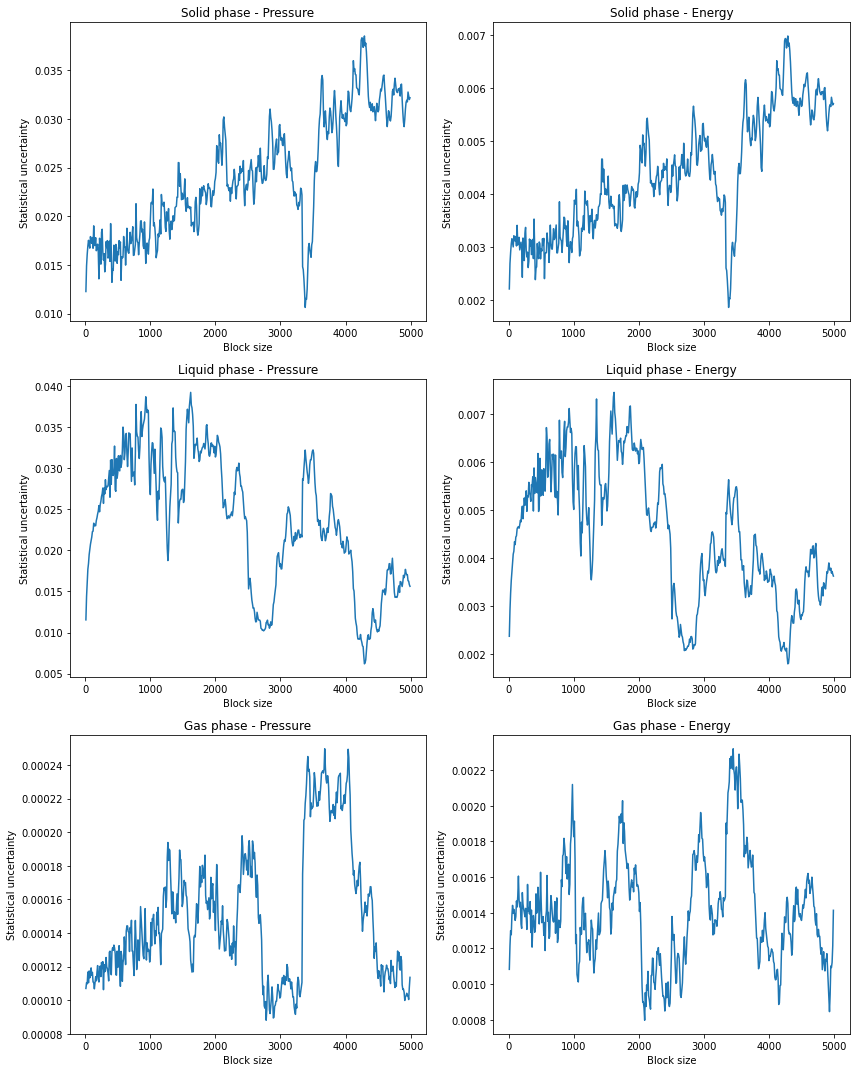

In [8]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (6*2, 5*3))
axes = axes.flatten()

x = [x for x in range(10,5000,10)]

err_pres = []
err_epot = []
for L in x:
    err_pres.append(error(y_pres_solid,L))
    err_epot.append(error(y_epot_solid,L))

axes[0].set_title('Solid phase - Pressure')
axes[0].plot(x, err_pres, label="Pressure")

axes[1].set_title('Solid phase - Energy')
axes[1].plot(x, err_epot, label="$U/N$")

err_pres = []
err_epot = []
for L in x:
    err_pres.append(error(y_pres_liquid,L))
    err_epot.append(error(y_epot_liquid,L))

axes[2].set_title('Liquid phase - Pressure')
axes[2].plot(x, err_pres, label="Pressure")

axes[3].set_title('Liquid phase - Energy')
axes[3].plot(x, err_epot, label="$U/N$")

err_pres = []
err_epot = []
for L in x:
    err_pres.append(error(y_pres_gas,L))
    err_epot.append(error(y_epot_gas,L))

axes[4].set_title('Gas phase - Pressure')
axes[4].plot(x, err_pres, label="Pressure")

axes[5].set_title('Gas phase - Energy')
axes[5].plot(x, err_epot, label="$U/N$")


for ax in axes:
    ax.set_xlabel('Block size')
    ax.set_ylabel('Statistical uncertainty')

fig.tight_layout()
plt.show()





The statistical error has an initial increase, due to the block size being still similar to the autocorrelation length. In particular there is a positive trend at the beginning in the liquid phase, suggesting that the uncertanties may be underestimated for this specific phase with small block sizes. However, it's not possible to find a regular trend in the statistical uncertainty variations.
The plots are in arbitrary unists, since I want to study the general behaviour of the data, not the actual value.

### Exercise 4

After adding the calculation of $g(r)$ to the code, i perform a simulation via a Lennard-Jones model for Argon and Krypton, using data blocking with 10000 blocks of size 50, and then I compare the results with the one i obtained using the Molecular Dynamic code in the Notebook 4.
The parameters to convert from the reduced units to SI units are the following:

<table>
    <tr>
        <th style="text-align: center">Argon</th>
        <th style="text-align: center">Krypton</th>
    </tr>
    <tr>
        <td><table>
            <tr>
                <th>Quantity</th><th>Value</th>
            </tr>
            <tr>
                <td>$\sigma$</td><td>0.34 nm</td>
            </tr>
            <tr>
                <td>$\epsilon/k_\text{B}$</td><td>120 K</td>
            </tr>
            <tr>
                <td>m</td><td>39.948 a.m.u.</td>
            </tr>
        </table></td>
        <td><table>
            <tr>
                <th>Quantity</th><th>Value</th>
            </tr>
            <tr>
                <td>$\sigma$</td><td>0.364 nm</td>
            </tr>
            <tr>
                <td>$\epsilon/k_\text{B}$</td><td>164 K</td>
            </tr>
            <tr>
                <td>m</td><td>83.798 a.m.u.</td>
            </tr>
        </table></td>
    </tr>
</table>

In [9]:
# Physical constants, in SI units
kb = 1.381e-23
amu = 1.661e-27

# Unit scales
ar_sigma = 0.34e-9
ar_energy = 120*kb
ar_mass = 39.948*amu

kr_sigma = 0.364e-9
kr_energy = 164*kb
kr_mass = 83.798*amu

integration_step = 0.0005
time_step_ar=integration_step*np.sqrt(ar_mass*ar_sigma*ar_sigma/ar_energy)
time_step_kr=integration_step*np.sqrt(kr_mass*kr_sigma*kr_sigma/kr_energy)

pres_ar = ar_energy/(ar_sigma*ar_sigma*ar_sigma)
pres_kr = kr_energy/(kr_sigma*kr_sigma*kr_sigma)
npart = 108

### Solid phase

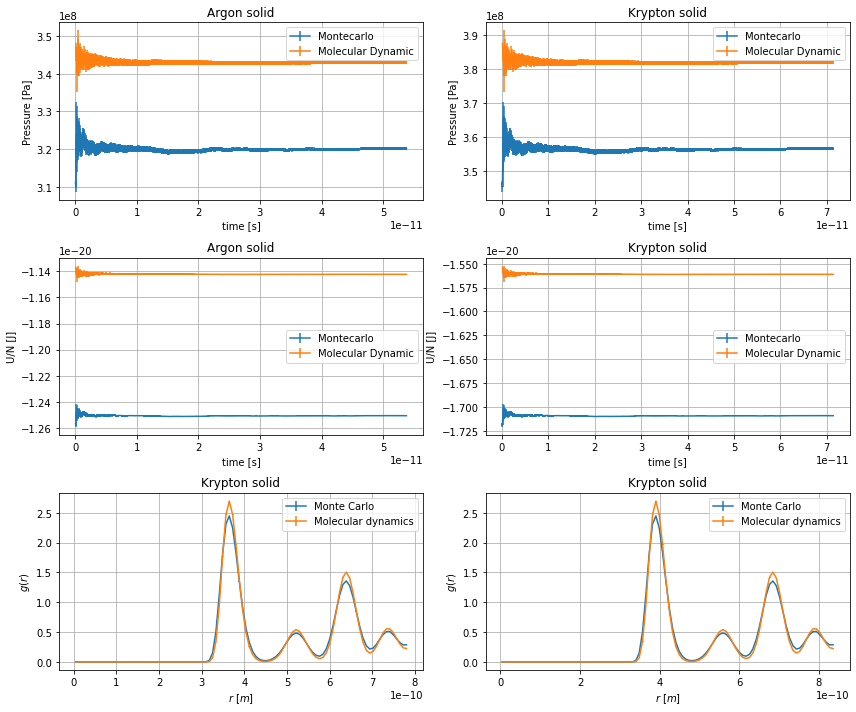

In [11]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (6*2, 5*2))
axes = axes.flatten()

x, y, err = np.loadtxt("7.3-4/data/solid/output.pres.0", unpack = True, usecols = (0,2,3))
x_md, y_md, err_md = np.loadtxt("7.3-4/data/MD/solid/ave_pres.out", unpack = True, usecols = (0,1,2))

x_ar = x*time_step_ar
y_ar = y*pres_ar
err_ar = err*pres_ar
axes[0].errorbar(x_ar,y_ar,yerr=err_ar, label = "Montecarlo")

x_ar = x_md*time_step_ar
y_ar = y_md*pres_ar
err_ar = err_md*pres_ar
axes[0].errorbar(x_ar,y_ar,yerr=err_ar, label = 'Molecular Dynamic')

axes[0].set_title("Argon solid")
axes[0].set_xlabel('time [s]')
axes[0].set_ylabel('Pressure [Pa]')
axes[0].legend()
axes[0].grid(True)

x_kr=x*time_step_kr
y_kr=y*pres_kr
err_kr=err*pres_kr
axes[1].errorbar(x_kr,y_kr,yerr=err_kr, label = 'Montecarlo')

x_kr=x_md*time_step_kr
y_kr=y_md*pres_kr
err_kr=err_md*pres_kr
axes[1].errorbar(x_kr,y_kr,yerr=err_kr, label = 'Molecular Dynamic')

axes[1].set_title("Krypton solid")
axes[1].set_xlabel('time [s]')
axes[1].set_ylabel('Pressure [Pa]')
axes[1].legend()
axes[1].grid(True)

x, y, err = np.loadtxt("7.3-4/data/solid/output.epot.0", unpack = True, usecols = (0,2,3))
x_md, y_md, err_md = np.loadtxt("7.3-4/data/MD/solid/ave_epot.out", unpack = True, usecols = (0,1,2))

x_ar=x*time_step_ar
y_ar=y*ar_energy
err_ar=err*ar_energy
axes[2].errorbar(x_ar,y_ar,yerr=err_ar, label = "Montecarlo")

x_ar=x_md*time_step_ar
y_ar=y_md*ar_energy
err_ar=err_md*ar_energy
axes[2].errorbar(x_ar,y_ar,yerr=err_ar, label = 'Molecular Dynamic')

axes[2].set_title("Argon solid")
axes[2].set_xlabel('time [s]')
axes[2].set_ylabel('U/N [J]')
axes[2].legend()
axes[2].grid(True)

x_kr=x*time_step_kr
y_kr=y*kr_energy
err_kr=err*kr_energy
axes[3].errorbar(x_kr,y_kr,yerr=err_kr, label = 'Montecarlo')

x_kr = x_md*time_step_kr
y_kr = y_md*kr_energy
err_kr = err_md*kr_energy

axes[3].errorbar(x_kr,y_kr,yerr=err_kr, label = 'Molecular Dynamic')
axes[3].set_title("Krypton solid")
axes[3].set_xlabel('time [s]')
axes[3].set_ylabel('U/N [J]')
axes[3].legend()
axes[3].grid(True)

x, y, err = np.loadtxt("7.3-4/data/solid/output.gave.0", unpack = True, usecols = (0,1,2))
x_md, y_md, err_md = np.loadtxt("7.3-4/data/MD/solid/ave_gr.out", unpack = True, usecols = (0,1,2))

x_ar = x * ar_sigma
axes[4].errorbar(x_ar, y, err, label = "Monte Carlo")

x_ar = x_md * ar_sigma
axes[4].errorbar(x_ar, y_md, err_md, label = "Molecular dynamics")

axes[4].set_title("Krypton solid")
axes[4].set_xlabel('$r$ $[m]$')
axes[4].set_ylabel('$g(r)$')
axes[4].grid(True)
axes[4].legend()

x_kr = x * kr_sigma
axes[5].errorbar(x_kr, y, err, label = "Monte Carlo")

x_kr = x_md * kr_sigma
axes[5].errorbar(x_kr, y_md, err_md, label = "Molecular dynamics")

axes[5].set_title("Krypton solid")
axes[5].set_xlabel('$r$ $[m]$')
axes[5].set_ylabel('$g(r)$')
axes[5].grid(True)
axes[5].legend()


plt.tight_layout()
plt.show()

### Liquid phase

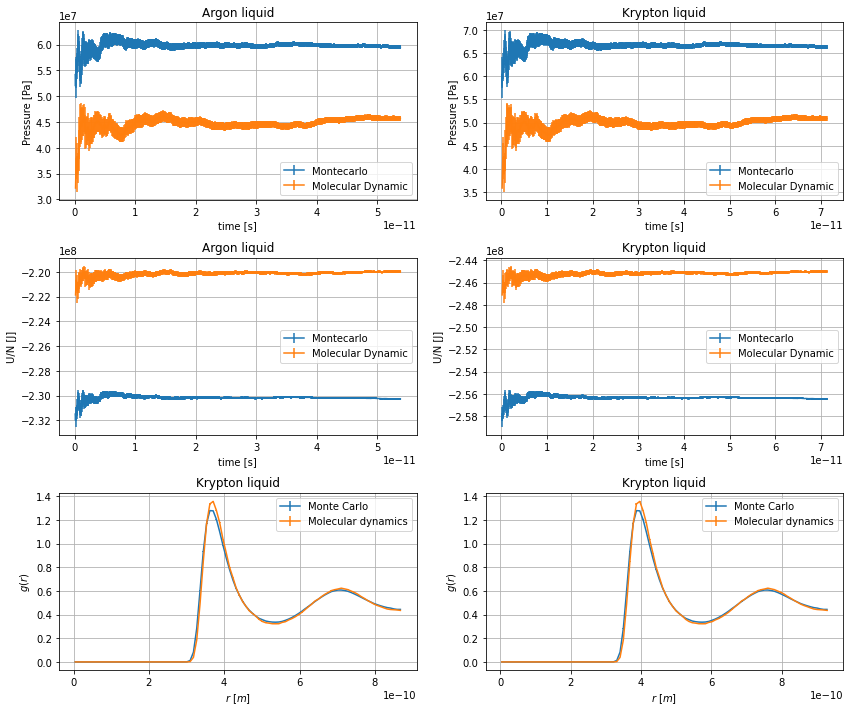

In [12]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (6*2, 5*2))
axes = axes.flatten()

x, y, err = np.loadtxt("7.3-4/data/liquid/output.pres.0", unpack = True, usecols = (0,2,3))
x_md, y_md, err_md = np.loadtxt("7.3-4/data/MD/liquid/ave_pres.out", unpack = True, usecols = (0,1,2))

x_ar=x*np.sqrt(ar_mass*ar_sigma*ar_sigma/ar_energy)*integration_step
y_ar=y*ar_energy/(ar_sigma*ar_sigma*ar_sigma)
err_ar=err*ar_energy/(ar_sigma*ar_sigma*ar_sigma)
axes[0].errorbar(x_ar,y_ar,yerr=err_ar, label = "Montecarlo")

x_ar=x_md*np.sqrt(ar_mass*ar_sigma*ar_sigma/ar_energy)*integration_step
y_ar=y_md*ar_energy/(ar_sigma*ar_sigma*ar_sigma)
err_ar=err_md*ar_energy/(ar_sigma*ar_sigma*ar_sigma)
axes[0].errorbar(x_ar,y_ar,yerr=err_ar, label = 'Molecular Dynamic')

axes[0].set_title("Argon liquid")
axes[0].set_xlabel('time [s]')
axes[0].set_ylabel('Pressure [Pa]')
axes[0].legend()
axes[0].grid(True)

x_kr=x*np.sqrt(kr_mass*kr_sigma*kr_sigma/kr_energy)*integration_step
y_kr=y*kr_energy/(kr_sigma*kr_sigma*kr_sigma)
err_kr=err*kr_energy/(kr_sigma*kr_sigma*kr_sigma)
axes[1].errorbar(x_kr,y_kr,yerr=err_kr, label = 'Montecarlo')

x_kr=x_md*np.sqrt(kr_mass*kr_sigma*kr_sigma/kr_energy)*integration_step
y_kr=y_md*kr_energy/(kr_sigma*kr_sigma*kr_sigma)
err_kr=err_md*kr_energy/(kr_sigma*kr_sigma*kr_sigma)
axes[1].errorbar(x_kr,y_kr,yerr=err_kr, label = 'Molecular Dynamic')

axes[1].set_title("Krypton liquid")
axes[1].set_xlabel('time [s]')
axes[1].set_ylabel('Pressure [Pa]')
axes[1].legend()
axes[1].grid(True)

x, y, err = np.loadtxt("7.3-4/data/liquid/output.epot.0", unpack = True, usecols = (0,2,3))
x_md, y_md, err_md = np.loadtxt("7.3-4/data/MD/liquid/ave_epot.out", unpack = True, usecols = (0,1,2))

x_ar=x*np.sqrt(ar_mass*ar_sigma*ar_sigma/ar_energy)*integration_step
y_ar=y*ar_energy/(ar_sigma*ar_sigma*ar_sigma)
err_ar=err*ar_energy/(ar_sigma*ar_sigma*ar_sigma)
axes[2].errorbar(x_ar,y_ar,yerr=err_ar, label = "Montecarlo")

x_ar=x_md*np.sqrt(ar_mass*ar_sigma*ar_sigma/ar_energy)*integration_step
y_ar=y_md*ar_energy/(ar_sigma*ar_sigma*ar_sigma)
err_ar=err_md*ar_energy/(ar_sigma*ar_sigma*ar_sigma)
axes[2].errorbar(x_ar,y_ar,yerr=err_ar, label = 'Molecular Dynamic')

axes[2].set_title("Argon liquid")
axes[2].set_xlabel('time [s]')
axes[2].set_ylabel('U/N [J]')
axes[2].legend()
axes[2].grid(True)

x_kr=x*np.sqrt(kr_mass*kr_sigma*kr_sigma/kr_energy)*integration_step
y_kr=y*kr_energy/(kr_sigma*kr_sigma*kr_sigma)
err_kr=err*kr_energy/(kr_sigma*kr_sigma*kr_sigma)
axes[3].errorbar(x_kr,y_kr,yerr=err_kr, label = 'Montecarlo')

x_kr = x_md*np.sqrt(kr_mass*kr_sigma*kr_sigma/kr_energy)*integration_step
y_kr = y_md*kr_energy/(kr_sigma*kr_sigma*kr_sigma)
err_kr = err_md*kr_energy/(kr_sigma*kr_sigma*kr_sigma)

axes[3].errorbar(x_kr,y_kr,yerr=err_kr, label = 'Molecular Dynamic')
axes[3].set_title("Krypton liquid")
axes[3].set_xlabel('time [s]')
axes[3].set_ylabel('U/N [J]')
axes[3].legend()
axes[3].grid(True)

x, y, err = np.loadtxt("7.3-4/data/liquid/output.gave.0", unpack = True, usecols = (0,1,2))
x_md, y_md, err_md = np.loadtxt("7.3-4/data/MD/liquid/ave_gr.out", unpack = True, usecols = (0,1,2))

x_ar = x * ar_sigma
axes[4].errorbar(x_ar, y, err, label = "Monte Carlo")

x_ar = x_md * ar_sigma
axes[4].errorbar(x_ar, y_md, err_md, label = "Molecular dynamics")

axes[4].set_title("Krypton liquid")
axes[4].set_xlabel('$r$ $[m]$')
axes[4].set_ylabel('$g(r)$')
axes[4].grid(True)
axes[4].legend()


x_kr = x * kr_sigma
axes[5].errorbar(x_kr, y, err, label = "Monte Carlo")

x_kr = x_md * kr_sigma
axes[5].errorbar(x_kr, y_md, err_md, label = "Molecular dynamics")

axes[5].set_title("Krypton liquid")
axes[5].set_xlabel('$r$ $[m]$')
axes[5].set_ylabel('$g(r)$')
axes[5].grid(True)
axes[5].legend()


plt.tight_layout()
plt.show()

### Gaseous phase

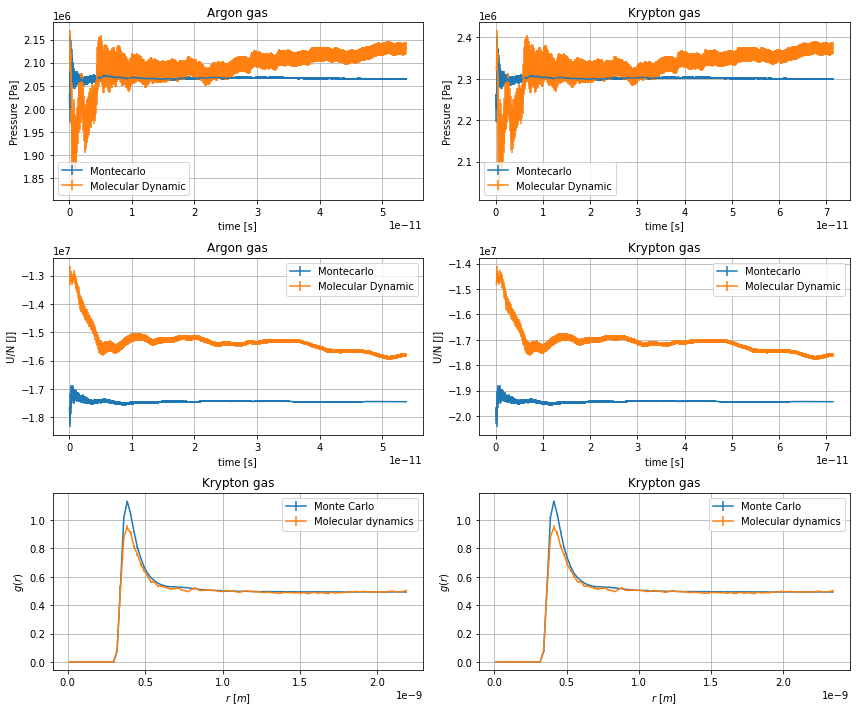

In [14]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (6*2, 5*2))
axes = axes.flatten()

x, y, err = np.loadtxt("7.3-4/data/gas/output.pres.0", unpack = True, usecols = (0,2,3))
x_md, y_md, err_md = np.loadtxt("7.3-4/data/MD/gas/ave_pres.out", unpack = True, usecols = (0,1,2))

x_ar=x*np.sqrt(ar_mass*ar_sigma*ar_sigma/ar_energy)*integration_step
y_ar=y*ar_energy/(ar_sigma*ar_sigma*ar_sigma)
err_ar=err*ar_energy/(ar_sigma*ar_sigma*ar_sigma)
axes[0].errorbar(x_ar,y_ar,yerr=err_ar, label = "Montecarlo")

x_ar=x_md*np.sqrt(ar_mass*ar_sigma*ar_sigma/ar_energy)*integration_step
y_ar=y_md*ar_energy/(ar_sigma*ar_sigma*ar_sigma)
err_ar=err_md*ar_energy/(ar_sigma*ar_sigma*ar_sigma)
axes[0].errorbar(x_ar,y_ar,yerr=err_ar, label = 'Molecular Dynamic')

axes[0].set_title("Argon gas")
axes[0].set_xlabel('time [s]')
axes[0].set_ylabel('Pressure [Pa]')
axes[0].legend()
axes[0].grid(True)

x_kr=x*np.sqrt(kr_mass*kr_sigma*kr_sigma/kr_energy)*integration_step
y_kr=y*kr_energy/(kr_sigma*kr_sigma*kr_sigma)
err_kr=err*kr_energy/(kr_sigma*kr_sigma*kr_sigma)
axes[1].errorbar(x_kr,y_kr,yerr=err_kr, label = 'Montecarlo')

x_kr=x_md*np.sqrt(kr_mass*kr_sigma*kr_sigma/kr_energy)*integration_step
y_kr=y_md*kr_energy/(kr_sigma*kr_sigma*kr_sigma)
err_kr=err_md*kr_energy/(kr_sigma*kr_sigma*kr_sigma)
axes[1].errorbar(x_kr,y_kr,yerr=err_kr, label = 'Molecular Dynamic')

axes[1].set_title("Krypton gas")
axes[1].set_xlabel('time [s]')
axes[1].set_ylabel('Pressure [Pa]')
axes[1].legend()
axes[1].grid(True)

x, y, err = np.loadtxt("7.3-4/data/gas/output.epot.0", unpack = True, usecols = (0,2,3))
x_md, y_md, err_md = np.loadtxt("7.3-4/data/MD/gas/ave_epot.out", unpack = True, usecols = (0,1,2))

x_ar=x*np.sqrt(ar_mass*ar_sigma*ar_sigma/ar_energy)*integration_step
y_ar=y*ar_energy/(ar_sigma*ar_sigma*ar_sigma)
err_ar=err*ar_energy/(ar_sigma*ar_sigma*ar_sigma)
axes[2].errorbar(x_ar,y_ar,yerr=err_ar, label = "Montecarlo")

x_ar=x_md*np.sqrt(ar_mass*ar_sigma*ar_sigma/ar_energy)*integration_step
y_ar=y_md*ar_energy/(ar_sigma*ar_sigma*ar_sigma)
err_ar=err_md*ar_energy/(ar_sigma*ar_sigma*ar_sigma)
axes[2].errorbar(x_ar,y_ar,yerr=err_ar, label = 'Molecular Dynamic')

axes[2].set_title("Argon gas")
axes[2].set_xlabel('time [s]')
axes[2].set_ylabel('U/N [J]')
axes[2].legend()
axes[2].grid(True)

x_kr=x*np.sqrt(kr_mass*kr_sigma*kr_sigma/kr_energy)*integration_step
y_kr=y*kr_energy/(kr_sigma*kr_sigma*kr_sigma)
err_kr=err*kr_energy/(kr_sigma*kr_sigma*kr_sigma)
axes[3].errorbar(x_kr,y_kr,yerr=err_kr, label = 'Montecarlo')

x_kr = x_md*np.sqrt(kr_mass*kr_sigma*kr_sigma/kr_energy)*integration_step
y_kr = y_md*kr_energy/(kr_sigma*kr_sigma*kr_sigma)
err_kr = err_md*kr_energy/(kr_sigma*kr_sigma*kr_sigma)

axes[3].errorbar(x_kr,y_kr,yerr=err_kr, label = 'Molecular Dynamic')
axes[3].set_title("Krypton gas")
axes[3].set_xlabel('time [s]')
axes[3].set_ylabel('U/N [J]')
axes[3].legend()
axes[3].grid(True)

x, y, err = np.loadtxt("7.3-4/data/gas/output.gave.0", unpack = True, usecols = (0,1,2))
x_md, y_md, err_md = np.loadtxt("7.3-4/data/MD/gas/ave_gr.out", unpack = True, usecols = (0,1,2))

x_ar = x * ar_sigma
axes[4].errorbar(x_ar, y, err, label = "Monte Carlo")

x_ar = x_md * ar_sigma
axes[4].errorbar(x_ar, y_md, err_md, label = "Molecular dynamics")

axes[4].set_title("Krypton gas")
axes[4].set_xlabel('$r$ $[m]$')
axes[4].set_ylabel('$g(r)$')
axes[4].grid(True)
axes[4].legend()


x, y, err = np.loadtxt("7.3-4/data/gas/output.gave.0", unpack = True, usecols = (0,1,2))
x_md, y_md, err_md = np.loadtxt("7.3-4/data/MD/gas/ave_gr.out", unpack = True, usecols = (0,1,2))

x_kr = x * kr_sigma
axes[5].errorbar(x_kr, y, err, label = "Monte Carlo")

x_kr = x_md * kr_sigma
axes[5].errorbar(x_kr, y_md, err_md, label = "Molecular dynamics")

axes[5].set_title("Krypton gas")
axes[5].set_xlabel('$r$ $[m]$')
axes[5].set_ylabel('$g(r)$')
axes[5].grid(True)
axes[5].legend()


plt.tight_layout()
plt.show()

For all the thress phases, the estimate obtained for Pressure and Internal Energy have the same order of magnitude, but are not statistically compatible with each other.

The radial distribution instead shows exactly the same behaviour for both the simulation methods, with the one obtained via MC simulation seems to be smoother than the MD one.